In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.ma.extras import average
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]
pd_df = pd.read_csv('adult.data', sep=',', names=columns, na_values='?', skipinitialspace=True)

In [2]:
types = [
    ("age", "i4"),
    ("workclass", "U25"),
    ("fnlwgt", "i4"),
    ("education", "U25"),
    ("education_num", "i4"),
    ("marital_status", "U25"),
    ("occupation", "U25"),
    ("relationship", "U25"),
    ("race", "U25"),
    ("sex", "U10"),
    ("capital_gain", "i4"),
    ("capital_loss", "i4"),
    ("hours_per_week", "i4"),
    ("native_country", "U25"),
    ("income", "U5")
]

np_df = np.genfromtxt("adult.data", missing_values='?', delimiter=',',
                      autostrip=True, dtype=types, encoding="UTF=8", filling_values='Unknown')

In [134]:
# #прибрати ? з np
# for name in np_df.dtype.names:
#     if np.issubdtype(np_df[name].dtype, np.str_):
#         np_df[name][np_df[name] == '?'] = 'Unknown'

In [3]:
print(pd_df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [4]:
pd_df.fillna({
    'occupation': pd_df['occupation'].mode()[0],
    'native_country': pd_df['native_country'].mode()[0],
    'workclass': pd_df['workclass'].mode()[0]
}, inplace=True)

In [5]:
print(pd_df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [7]:
for name in np_df.dtype.names:
    if np.issubdtype(np_df[name].dtype, np.str_):
        count = np.sum(np_df[name] == '?')
        print(f"{name}: {count} '?'")


workclass: 1836 '?'
education: 0 '?'
marital_status: 0 '?'
occupation: 1843 '?'
relationship: 0 '?'
race: 0 '?'
sex: 0 '?'
native_country: 583 '?'
income: 0 '?'


In [8]:
for field in ['occupation', 'native_country', 'workclass']:
    # Отримуємо масив значень, які не 'Unknown'
    values = np_df[field][np_df[field] != '?']

    # Рахуємо унікальні значення та їх частоти
    unique, counts = np.unique(values, return_counts=True)

    # Шукаємо найбільш часте значення (mode)
    most_seen = np.argmax(counts)
    mode = unique[most_seen]

    # Замінюємо Unknown на mode
    np_df[field][np_df[field] == '?'] = mode

In [9]:
for field in ['occupation', 'native_country', 'workclass']:
    if np.issubdtype(np_df[field].dtype, np.str_):
        count = np.sum(np_df[field] == '?')
        print(f"{field}: {count} '?'")

occupation: 0 '?'
native_country: 0 '?'
workclass: 0 '?'


Cтандартизувати

In [10]:
import pandas as pd


pd_float = pd_df.select_dtypes(include='number')
# pd_std = (pd_float - pd_float.mean()) / pd_float.std()
pd_std = (pd_float - pd_float.min())/(pd_float.max()-pd_float.min())
pd_cat = pd_df.select_dtypes(exclude='number')
pd_final = pd.concat([pd_cat, pd_std], axis=1)


In [11]:
fields = np_df.dtype.names

# Відокремлюємо числові та рядкові
num_fields = [f for f in fields if np.issubdtype(np_df[f].dtype, np.number)]
cat_fields = [f for f in fields if np.issubdtype(np_df[f].dtype, np.str_)]

np_cat = np.column_stack([np_df[f] for f in cat_fields])
np_float = np.column_stack([np_df[f] for f in num_fields])

np_std = (np_float - np_float.mean(axis=0)) / np_float.std(axis=0)
np_final = np.column_stack((np_cat, np_std))

Гістограма

In [143]:
pd_final.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income', 'age',
       'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(pd_final['hours_per_week'], bins = 10)

plt.title('Гістограма hours_per_week pd')

plt.savefig('pd_hist.png', dpi=400)
plt.close()

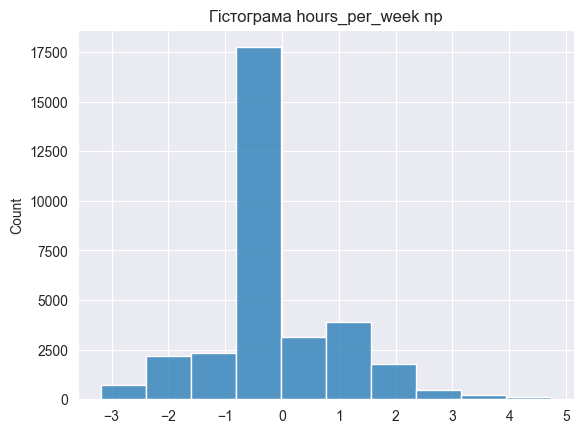

In [14]:
attr = np_final[:, -1].astype(float)
sns.histplot(attr, bins = 10)

plt.title('Гістограма hours_per_week np')

plt.savefig('np_hist.png', dpi=400)
plt.show()

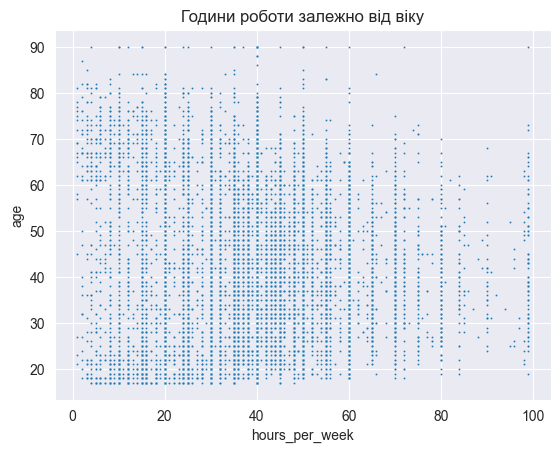

In [19]:
sns.scatterplot(x='hours_per_week', y='age', data=pd_df, s=2)
plt.title('Години роботи залежно від віку')
plt.xlabel('hours_per_week')
plt.ylabel('age')

plt.savefig('pd_scatter_plot.png', dpi=400)
plt.show()

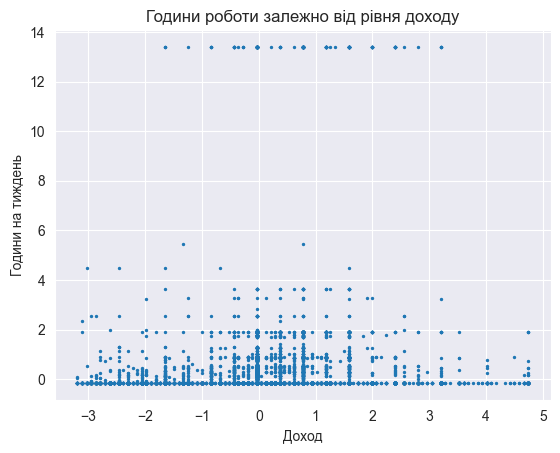

In [20]:
attr_x=np_final[:, -1].astype(float)
attr_y=np_final[:, -3].astype(float)

plt.scatter(attr_x, attr_y, s=2)

plt.title('Години роботи залежно від рівня доходу')
plt.xlabel('Доход')
plt.ylabel('Години на тиждень')

plt.savefig('np_scatter_plot.png', dpi=400)
plt.show()

Коефіцієнти Пірсона та Спірмена

In [149]:
from scipy.stats import pearsonr, spearmanr

x = pd_final['hours_per_week']
y = pd_final['capital_gain']

pearson_corr, pearson_p = pearsonr(x, y)
spearman_corr, spearman_p = spearmanr(x, y)

print(f"Pearson correlation: {pearson_corr:.4f} (p = {pearson_p:.4f})")
print(f"Spearman correlation: {spearman_corr:.4f} (p = {spearman_p:.4f})")


Pearson correlation: 0.0784 (p = 0.0000)
Spearman correlation: 0.0933 (p = 0.0000)


In [150]:
x = np_final[:,-1].astype(float)
y = np_final[:,-3].astype(float)

pearson_corr, pearson_p = pearsonr(x, y)
spearman_corr, spearman_p = spearmanr(x, y)

print(f"Pearson correlation: {pearson_corr:.4f} (p = {pearson_p:.4f})")
print(f"Spearman correlation: {spearman_corr:.4f} (p = {spearman_p:.4f})")

Pearson correlation: 0.0784 (p = 0.0000)
Spearman correlation: 0.0933 (p = 0.0000)


Провести One Hot Encoding категоріального string атрибуту.

In [21]:
from sklearn.preprocessing import OneHotEncoder

# Вибираємо одну колонку як 2D-масив
X = pd_df[['occupation']]

# Ініціалізуємо енкодер
# sparse_output шоб повернутий результат був масивом нп, а не чимось там ще
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Навчаємо та перетворюємо
encoded = encoder.fit_transform(X)

# Отримаємо імена нових колонок
columns = encoder.get_feature_names_out(['occupation'])
encoded_df = pd.DataFrame(encoded, columns=columns)
# Об'єднуємо назад з рештою
pd_enc = pd.concat([pd_df.drop('occupation', axis=1), encoded_df], axis=1)


In [22]:
# щоб можна було приєднати тесктові дані, які в np_final, і флоат
np_final = np.array(np_final, dtype=object)

np_enc = np.hstack((np_final, encoded))

In [24]:
print(pd_enc)

       age         workclass  fnlwgt   education  education_num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital_status   relationship   race     sex  capital_gain  ...  \
0           Never-married  Not-in-family  White    Male          2174  ...   
1      Married-civ-spouse        Husban

In [161]:
# for_plot = pd_final[['sex', 'income', 'capital_gain', 'occupation']].copy()
# # for_plot['capital_gain'] = for_plot['capital_gain'].clip(upper=6)
# # for_plot['capital_gain_log'] = np.log1p(for_plot['capital_gain'])
# for_plot['combo'] = for_plot['sex'] + '|' + for_plot['income']
# sns.violinplot(x='occupation', y='capital_gain', hue='combo',data=for_plot, palette='Set1')
#
# plt.title('Capital gain в залежності від статі та рівня доходу')
# plt.xlabel('Стать + Дохід')
# plt.ylabel('Capital gain')
#
# plt.savefig('pd_multidimensional.png', dpi=400)
# plt.close()

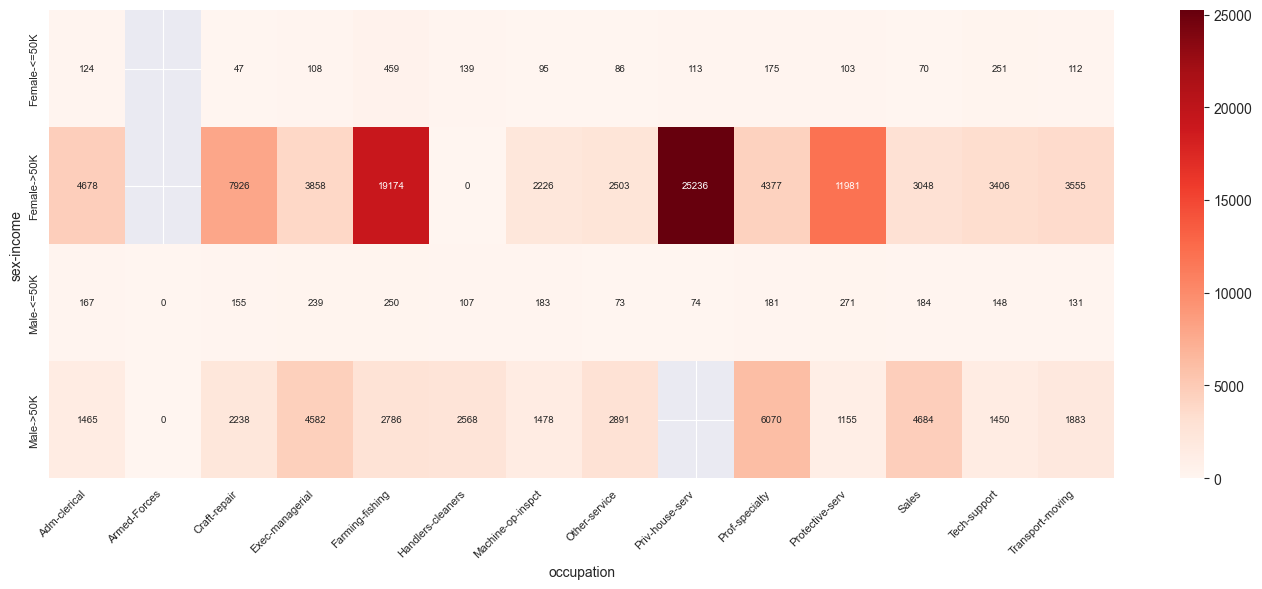

In [26]:
plt.figure(figsize=(14, 6))

table = pd.crosstab(
    index=[pd_df['sex'], pd_df['income']],
    columns=pd_df['occupation'],
    values=pd_df['capital_gain'],
    aggfunc='mean')
sns.heatmap(table, annot=True, cmap='Reds', fmt=".0f", annot_kws={"size": 7})

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()


plt.savefig('pd_multidimensional.png', dpi=500)
plt.show()